<a href="https://colab.research.google.com/github/sandesh8055/Python/blob/main/Python_and_EDA_Foundations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Notebook Outline
1. Introduction & Purpose
2. Python Basics (Quick but solid)
3. Understanding Data (Rows, Columns, Types)
4. Statistics for EDA
5. Visual Exploratory Data Analysis
6. Reading Insights from Charts
7. Mini Case Study

Introduction cell
# Python & Exploratory Data Analysis (EDA)

## Purpose
This notebook is designed to build strong foundations in Python and Exploratory Data Analysis (EDA).
It focuses not only on *how* to write code, but also on *how to read data, interpret patterns,
and extract meaningful insights* from real-world datasets.

The concepts demonstrated here are applicable across domains such as:
- Aviation & airports
- Maritime & ports
- Smart buildings & infrastructure
- Enterprise and operational systems

This notebook emphasizes analytical thinking, visualization, and business understanding.


Importing libraries

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Why these libraries?

- **Pandas**: used to work with tabular data (rows & columns)
- **NumPy**: used for numerical operations and arrays
- **Matplotlib & Seaborn**: used for data visualization

In real analytics and engineering roles, most insights start with these tools.

Create a simple dataset

In [11]:
data = {
    "Day": ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
    "Passengers": [1200, 1350, 1100, 1600, 1800, 2200, 2000],
    "Delays": [12, 15, 10, 18, 20, 25, 22]
}

df = pd.DataFrame(data)
df

,Day,Passengers,Delays
0,Mon,1200,12
1,Tue,1350,15
2,Wed,1100,10
3,Thu,1600,18
4,Fri,1800,20
5,Sat,2200,25
6,Sun,2000,22


This dataset simulates simple **airport operations data**:
- Passenger count per day
- Number of delayed flights per day

Before complex models, engineers always start by *looking at the data*.

First EDA rule — Always look at the data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Day         7 non-null      object
 1   Passengers  7 non-null      int64 
 2   Delays      7 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 300.0+ bytes


### Why `.info()` is important

It tells us:
- Number of rows
- Column names
- Data types
- Missing values

This is the first thing professionals check before analysis.

Basic statistics

In [13]:
df.describe()

,Passengers,Delays
count,7.000000,7.000000
mean,1607.142857,17.428571
std,414.757531,5.411628
min,1100.000000,10.000000
25%,1275.000000,13.500000
50%,1600.000000,18.000000
75%,1900.000000,21.000000
max,2200.000000,25.000000


### What does this tell us?

- **Mean**: average value
- **Min / Max**: range
- **Std (standard deviation)**: variability

Example insight:
If passenger count has high variability, operations and staffing become harder to plan.

First visualization — Line chart

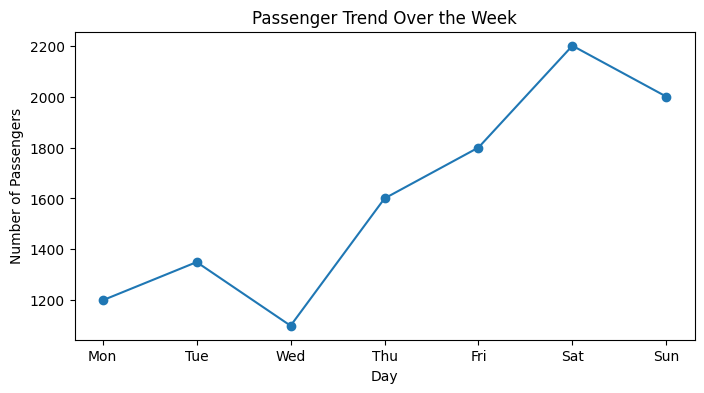

In [14]:
plt.figure(figsize=(8,4))
plt.plot(df["Day"], df["Passengers"], marker="o")
plt.title("Passenger Trend Over the Week")
plt.xlabel("Day")
plt.ylabel("Number of Passengers")
plt.show()

### How to interpret this chart

- Passenger traffic increases toward the weekend
- Peak observed on Saturday
- Indicates higher operational load on weekends

**Business insight**:
Airports should allocate more staff and resources during weekends.

Relationship analysis — Scatter plot

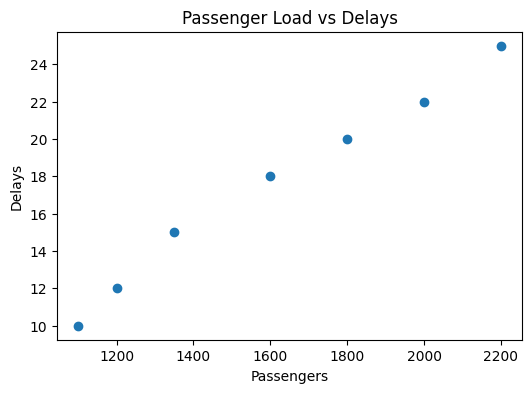

In [15]:
plt.figure(figsize=(6,4))
plt.scatter(df["Passengers"], df["Delays"])
plt.xlabel("Passengers")
plt.ylabel("Delays")
plt.title("Passenger Load vs Delays")
plt.show()

### Insight

- As passenger count increases, delays also tend to increase
- Indicates congestion-related delays

This kind of analysis is used in:
- Aviation
- Ports
- Metro systems
- Retail footfall analysis

Distribution, Outliers & Correlation

Histogram — How values are distributed

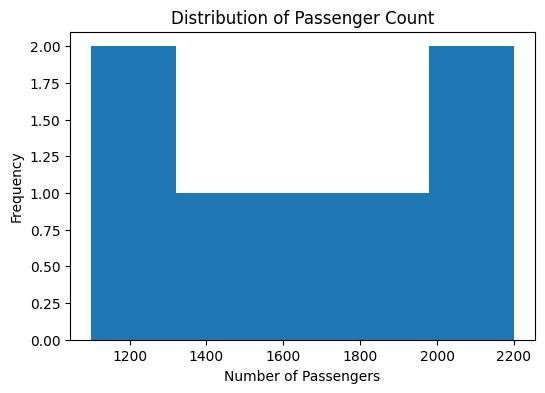

In [16]:
plt.figure(figsize=(6,4))
plt.hist(df["Passengers"], bins=5)
plt.xlabel("Number of Passengers")
plt.ylabel("Frequency")
plt.title("Distribution of Passenger Count")
plt.show()

Most passenger volumes fall in the higher range, indicating consistently high traffic.
Operations teams should plan staffing assuming high baseline load.

Boxplot — Finding outliers & risk days

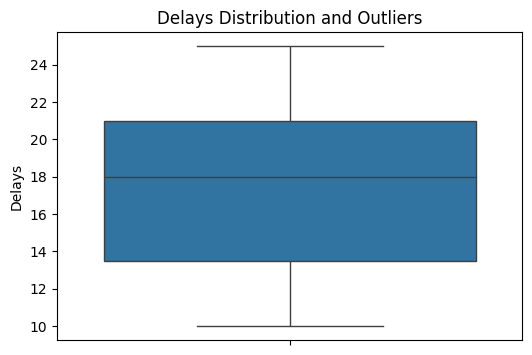

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df["Delays"])
plt.title("Delays Distribution and Outliers")
plt.show()

Outliers indicate days with unusually high delays.
These days require root cause analysis (weather, staffing, system issues).

Correlation — Do things move together?

In [20]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
numeric_df

,Passengers,Delays
0,1200,12
1,1350,15
2,1100,10
3,1600,18
4,1800,20
5,2200,25
6,2000,22


In [21]:
numeric_df.corr()

,Passengers,Delays
Passengers,1.000000,0.993428
Delays,0.993428,1.000000


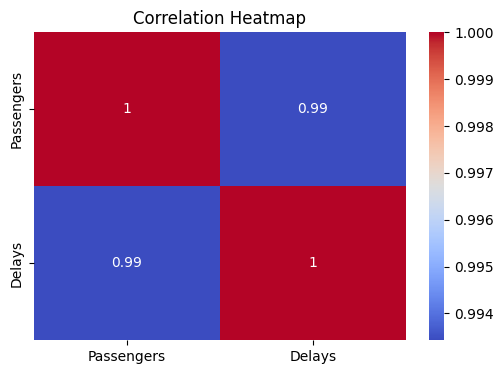

In [22]:
plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Note on Correlation Analysis

Correlation analysis requires numerical data.
Categorical columns (e.g., day names) must be excluded before computing correlations.
This step is critical in real-world datasets to avoid misleading results or errors.

Passenger count shows positive correlation with delays.
This suggests congestion contributes to operational delays.

## Mini Case Study: Airport Weekly Operations

**Observation**
- Passenger traffic peaks on weekends
- Delays increase with passenger load
- Outlier delay days exist

**Interpretation**
- Congestion during peak days impacts punctuality
- Normal staffing levels may be insufficient on weekends

**Recommendation**
- Increase operational staffing during peak days
- Investigate outlier days for systemic issues